### A Nasty integral

Using Monte Carlo integratio check that

$$ \mathcal{I} = \int_0^{\infty} dx x^{3} \exp \left(-\frac{x^2}{2\sigma^{2}}\right)  = 2\sigma^{4}$$

1. Does the result converge with the number of samples? And how does the error go down?
2. Do it many times. For a given N, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks very accurate! And if 
 is small?)
3. How does the distribution change if N increases?

Dumb way, do it again

$$ \mathcal{I} = \int_0^{\infty} dx x^{3} \exp \left(-\frac{x^2}{2\sigma^{2}}\right)  = \sigma\sqrt{2\pi} \int_0^{\infty} dx x^{3} \text{Gauss}(\mu=0,\sigma) \approx \sigma\sqrt{2\pi} \frac{1}{2N} \sum_i z_{i}^{3}$$
where $\mathcal{z_i}$ is randomly extracted from a gaussian distribution with $\mu = 0$ and $\sigma=...$

In [337]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [338]:
sigma = 1 #standard deviation of the normal distribution

In [339]:
N           = int(1e4)# number of experiments
exps        = np.arange(1,N+1,10)
vals        = np.zeros(exps.size) 
res         = np.zeros(exps.size) 

In [340]:
def compute(exps):
    for i,n in enumerate(exps):
        xi = np.random.normal(0,sigma, n)
        zi = xi[xi>0]**3
        vals[i] = 0.5 * zi.mean() * sigma * np.sqrt(2 * np.pi)
        res[i]  = vals[i] - 2*sigma**4
    return vals, res

In [341]:
vals, res = compute(exps)

C:\Users\ricca\AppData\Local\Temp\ipykernel_9444\2893537648.py:5: RuntimeWarning: Mean of empty slice.
  vals[i] = 0.5 * zi.mean() * sigma * np.sqrt(2 * np.pi)
c:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


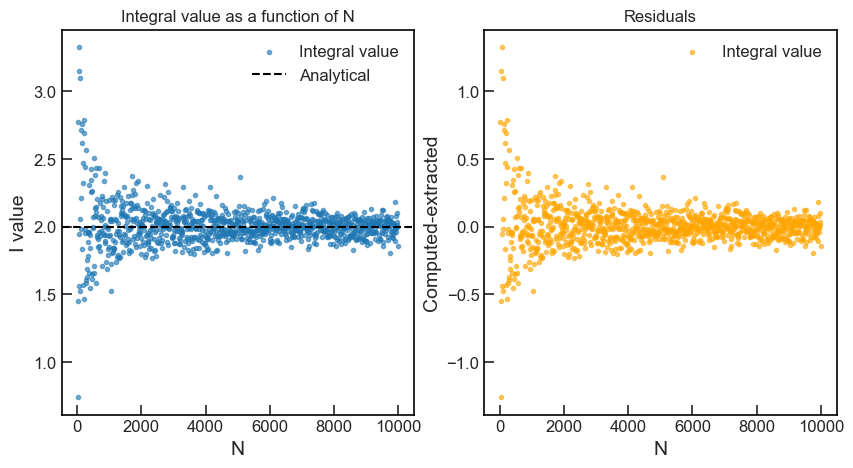

In [342]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(exps,vals,marker='.',alpha=0.6,label='Integral value')
axs[0].set_title('Integral value as a function of N')
axs[0].set_xlabel('N')
axs[0].set_ylabel('I value')
axs[0].axhline(2*sigma**4,0,1,linestyle='dashed',color='black',label='Analytical')
axs[0].grid()
axs[0].legend()

axs[1].scatter(exps,res,marker='.',alpha=0.6,label='Integral value',color='orange')
axs[1].set_title('Residuals')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Computed-extracted')
axs[1].grid()
axs[1].legend()

In [213]:
E = np.arange(int(1e2),int(1e4+1e2),int(1e3)) # number of experiments

In [214]:
def compute2():
    B = int(1e5) # number of extracted numbers from gaussian
    xi  = np.random.normal(0,sigma,B)
    zi  = xi[xi>0]**3
    val = 0.5 * zi.mean() * sigma * np.sqrt(2 * np.pi)
    res = vals[i] - 2*sigma**4
    return val, res

In [218]:
integrals,errors = [], []
for i,n in enumerate(E):
    Is = np.zeros(n)
    Rs = np.zeros(n)
    for j in range(n):
        Is[j], Rs[j] = compute2()   
    integrals.append(Is.mean())
    errors.append(1/np.sqrt(2*(n-1))*Is.std())

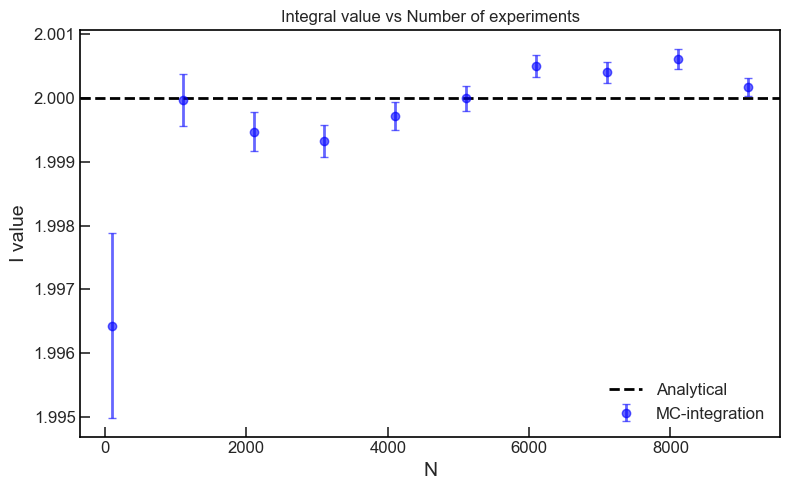

In [350]:
plt.rcParams['text.usetex'] = False
plt.errorbar(E,integrals,errors,fmt='o',color='blue',alpha=0.6,linewidth=2,label='MC-integration',capsize=3)
plt.title('Integral value vs Number of experiments')
plt.xlabel('N')
plt.ylabel('I value')
plt.axhline(2*sigma**4,0,1,linestyle='dashed',color='black',label='Analytical',linewidth=2)
plt.grid()
plt.legend()
plt.tight_layout()

How does the distribution change with N?

In [351]:
counts_list = []  # Store counts for different n
bins_list = [] 

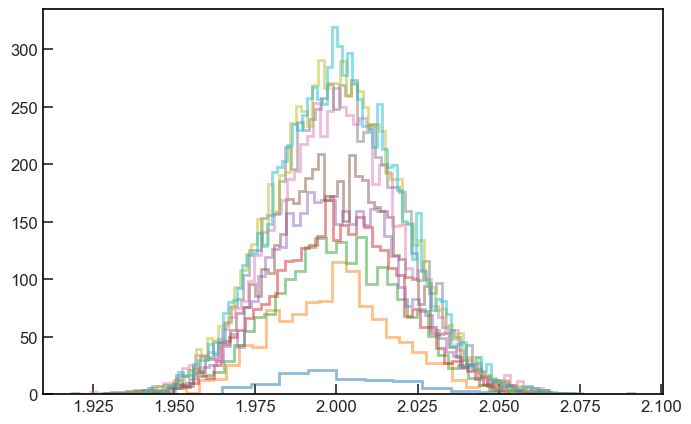

In [353]:
for i, n in enumerate(E):
    Is = np.zeros(n)
    Rs = np.zeros(n)

    for j in range(n):
        Is[j], Rs[j] = compute2()  

    # Compute histogram data
    counts, bins, _ = plt.hist(Is, bins=int(np.sqrt(n)), density=False, 
                               alpha=0.5, histtype='step', linewidth=2)

    # Store histogram results
    counts_list.append(counts)
    bins_list.append(bins)

In [ ]:
def gauss(x,A,mu,sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

bin_centers = (bins[:-1] + bins[1:]) / 2  
p0 = [300, bin_centers[np.argmax(counts)], sigma]
popt, pcov = curve_fit(gauss, bin_centers, counts, p0)

Text(1.9361252956927386, 287.1, '$\\mu = 2.00$\n$\\sigma = -0.02$')

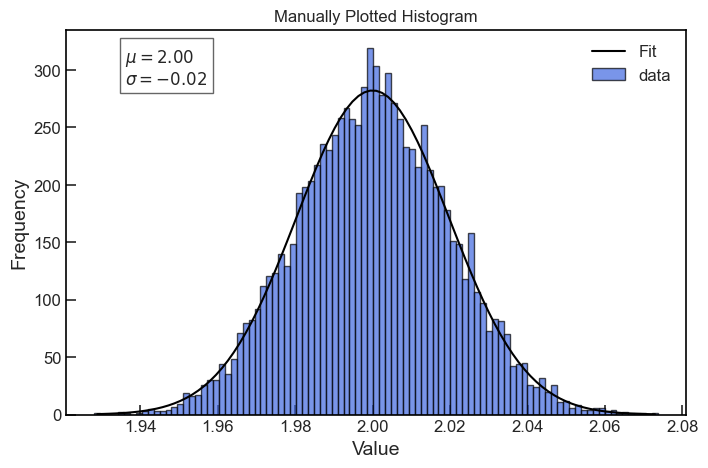

In [360]:
# Plot manually using bar chart
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, counts, width=np.diff(bins), color='royalblue', alpha=0.7, edgecolor='black', label='data')
plt.plot(bin_centers, gauss(bin_centers, *popt), color='black', label='Fit')
# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Manually Plotted Histogram')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
x_pos = min(bin_centers) + 0.05 * (max(bin_centers) - min(bin_centers))  # 5% from the left
y_pos = max(counts) * 0.9  # 90% of max count

# Add text annotation
plt.text(x_pos, y_pos, 
         r'$\mu = {:.2f}$' '\n' r'$\sigma = {:.2f}$'.format(popt[1], popt[2]), 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.6))